<a href="https://colab.research.google.com/github/paragnayak/Data-Science/blob/master/EMI_Date_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMI Date Tracker 

The main idea is to analyse the data and try to come up with a solution of different ways a payment is made of each installment of an EMI and put them in the DPD buckets .

This then can be used in the visualization of the various EMI Months and thus help us to capture and understand the data in a better manner.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = pd.read_excel('/content/drive/My Drive/Liquiloans/Master Collection Report (1).xlsx')

In [4]:
data.shape

(16045, 35)

In [0]:
pd.set_option('display.max_columns',500)

In [6]:
data.head(1)

,Loan Id,Loan Type,Interest Type,Branch,Source,Source Name,Sub Source Name,Customer Name,Customer Mobile,PAN Card,Loan Amount,Disbursement Amount,Disbursement Date,EMI Amount,EMI Start Date,Upcoming EMI Date,No. Of EMI Received,Cumulative Amount Collected,Amount Received In Percentage,No. Of Pending EMIs,Cumulative Amount Pending,Amount Pending In Percentage,Last Payment Date(s),Last Payment Amount(s),Average DPD,Cumulative OverDue Amount,Cumulative Overdue Collected,Cumulative Penalty Amount,Cumulative Penalty Amount Collected,Extra Amount Received,Mode Of Repayment,Nach Status,UMRN Number,Agreement Date,Balance Disbursement Amount
0,CL00001699,UnSecured Loan,Diminishing,Mumbai,Dealer,NaN,Morpheous,Vandana - Singh,7409250280,ARFPV3133R,88200.0,86796.0,16/01/2019,12000.0,02/02/2019 00:00:00,NaN,8.0,96000,100.0,0.0,0.0,0.0,"2019-02-08,2019-02-08,2019-02-08,2019-02-08,20...","12000.00,12000.00,12000.00,12000.00,12000.00,1...",0,0,72.0,288,72.0,0,Cash,Registered,SBIN0000000027645734,16/01/2019,-650.0


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16045 entries, 0 to 16044
Data columns (total 35 columns):
Loan Id                                16045 non-null object
Loan Type                              16045 non-null object
Interest Type                          16045 non-null object
Branch                                 16045 non-null object
Source                                 16045 non-null object
Source Name                            0 non-null float64
Sub Source Name                        16045 non-null object
Customer Name                          16045 non-null object
Customer Mobile                        16045 non-null int64
PAN Card                               15934 non-null object
Loan Amount                            16045 non-null float64
Disbursement Amount                    16045 non-null float64
Disbursement Date                      15942 non-null object
EMI Amount                             16045 non-null float64
EMI Start Date                        

In [0]:
import pandas_profiling

In [9]:
pandas_profiling.ProfileReport(data)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,35
Number of observations,16045
Total Missing (%),7.1%
Total size in memory,4.3 MiB
Average record size in memory,280.0 B
Numeric,11
Categorical,13
Boolean,0
Date,0
Text (Unique),1
Rejected,10


In [10]:
data['Last Payment Date(s)']

0        2019-02-08,2019-02-08,2019-02-08,2019-02-08,20...
1        2019-03-25,2019-08-27,2019-01-10,2019-02-25,20...
2        2019-02-15,2018-12-15,2019-03-15,2019-01-15,20...
3        2019-07-15,2019-03-15,2018-12-15,2019-08-15,20...
4                         2019-01-25,2019-02-25,2019-01-17
                               ...                        
16040                                                  NaN
16041                                                  NaN
16042                                                  NaN
16043                                                  NaN
16044                                                  NaN
Name: Last Payment Date(s), Length: 16045, dtype: object

In [11]:
(data.isnull().sum()[data.isnull().sum()!=0]/len(data))*100

Source Name               100.000000
PAN Card                    0.691804
Disbursement Date           0.641945
Upcoming EMI Date          12.184481
Last Payment Date(s)       21.022125
Last Payment Amount(s)     21.022125
Nach Status                46.662512
UMRN Number                46.662512
dtype: float64

In [0]:
col1 = data['Last Payment Date(s)']
col2 = []
for i in range(len(col1)):
  if type(col1[i]) == str:
    col2.append(sorted(col1[i].split(',')))
  else:
    col2.append(0)

In [13]:
col2

[['2019-02-08',
  '2019-02-08',
  '2019-02-08',
  '2019-02-08',
  '2019-02-08',
  '2019-02-08',
  '2019-02-08',
  '2019-02-08'],
 ['2018-12-25',
  '2019-01-10',
  '2019-02-25',
  '2019-03-25',
  '2019-04-25',
  '2019-05-25',
  '2019-06-25',
  '2019-07-25',
  '2019-08-27'],
 ['2018-12-15',
  '2019-01-15',
  '2019-02-15',
  '2019-03-15',
  '2019-04-15',
  '2019-05-15'],
 ['2018-12-15',
  '2019-01-15',
  '2019-02-15',
  '2019-03-15',
  '2019-04-15',
  '2019-05-15',
  '2019-06-15',
  '2019-07-15',
  '2019-08-15',
  '2019-09-15'],
 ['2019-01-17', '2019-01-25', '2019-02-25'],
 ['2018-12-20',
  '2019-01-20',
  '2019-02-20',
  '2019-03-20',
  '2019-04-20',
  '2019-05-20'],
 ['2018-12-20',
  '2019-01-18',
  '2019-01-20',
  '2019-02-20',
  '2019-03-18',
  '2019-04-21',
  '2019-05-20',
  '2019-07-20',
  '2019-08-20'],
 ['2018-12-20',
  '2019-01-20',
  '2019-02-20',
  '2019-03-20',
  '2019-04-20',
  '2019-05-20',
  '2019-06-20',
  '2019-07-20'],
 ['2019-01-10',
  '2019-02-10',
  '2019-03-10',
  '2

In [0]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
for i in range(len(col2)):
  if col2[i] != 0:
    a = col2[i]
    for j in range(len(a)-1):
      delta = pd.to_datetime(a[j+1])-pd.to_datetime(a[j])
      x = delta.days
      if (x>0) and (x<=30):
        count1 = count1 +1
      elif (x>30) and (x<=60):
        count2 = count2+1
      elif (x>60) and (x<=90):
        count3 = count3 +1
      elif x>90:
        count4 = count4 +1
      else:
        count5 = count5+1

In [0]:
import datetime
data['EMI Start Date']= [datetime.datetime.strptime(x, '%d/%m/%Y %H:%M:%S') for x in data['EMI Start Date'] ] 

In [0]:
import datetime
data['Upcoming EMI Date']= pd.to_datetime(data['Upcoming EMI Date'],format = '%d/%m/%Y')

In [0]:
import datetime
from datetime import timedelta
EMI_cat = []
index1 = []
for i in range(len(col2)):
  if col2[i] != 0:
    a = col2[i]
    for j in range(len(a)):
      delta = pd.to_datetime(a[j])-(pd.to_datetime(data['EMI Start Date'][i]) + timedelta(days=(30*j)))
      x = delta.days
      if ((x>=0) and (x<=5)) or (x<0):
        EMI_cat.append('0')
      elif (x>5) and (x<=30):
        EMI_cat.append('1')
      elif (x>30) and (x<=60):
        EMI_cat.append('2')
      elif (x>60) and (x<=90):
        EMI_cat.append('3')
      elif x>90:
        EMI_cat.append('4')
  else:
    EMI_cat.append('Not_paid_single_EMI')

In [0]:

sns.countplot(EMI_cat)
plt.xticks(rotation=45)
plt.show()

In [0]:
Loan_ID_Risk = []
for i in index1:
  Loan_ID_Risk.append(data['Loan Id'][i])
  

In [20]:
Loan_ID_Risk

[]

In [21]:
pd.Series(EMI_cat).value_counts()

0                      43198
1                       4352
Not_paid_single_EMI     3373
2                       1860
3                        301
4                        148
dtype: int64

In [22]:
str1 = '2019-02-08'
str2 = '2019-03-08'
delta = pd.to_datetime(str2)-pd.to_datetime(str1)
print(delta.days)

28


In [0]:
Pay_string = []
for i in range(len(data)):
  str1 = ''
  if col2[i] != 0:
    a = col2[i]
    for j in range(len(a)):
      delta = pd.to_datetime(a[j])-(pd.to_datetime(data['EMI Start Date'][i]) + timedelta(days=(30*j)))
      x = delta.days
      if ((x>=0) and (x<=5)) or (x<0):
        str1 = str1 + str(0)
      elif (x>=6) and (x<=30):
        str1 = str1 + str(1)
      elif (x>=31) and (x<=60):
        str1 = str1 + str(2)
      elif (x>=61) and (x<=90):
        str1 = str1 + str(3)
      elif (x>90):
        str1 = str1 + str(4)
  else:
    str1 = str1 + ''
  Pay_string.append(str1)



In [24]:
Pay_string

['10000000',
 '000000000',
 '000000',
 '0000000000',
 '100',
 '000000',
 '000000000',
 '00000000',
 '00000000000',
 '000000102221',
 '000000000',
 '0112232122',
 '000000000',
 '000000000',
 '11100201002',
 '010002000',
 '0000000',
 '010000000',
 '',
 '0000',
 '000000000000',
 '101000',
 '000001',
 '000000000000',
 '00001001110',
 '000000000',
 '',
 '0000000000000000',
 '00000000',
 '000000001',
 '000000000',
 '00002',
 '00010001',
 '010000',
 '000000',
 '0000000000000',
 '00000000000',
 '000000000',
 '000000000',
 '000000000',
 '1000000000',
 '00000000001',
 '00000000000',
 '100000101',
 '010000000',
 '',
 '000321000',
 '000010000',
 '00012000',
 '100124433',
 '0022224',
 '000000000',
 '11111011',
 '0',
 '101101101',
 '00000000000',
 '000032210000000',
 '01000010',
 '000000000',
 '01011101',
 '000000000',
 '0001000022',
 '200000000',
 '000000',
 '14',
 '21000',
 '00000000000',
 '0010020000',
 '00000000000',
 '000000000',
 '0000000002',
 '0',
 '01101232',
 '02211321',
 '0000001111',
 '1

In [0]:
import pandas
col3 = data['Upcoming EMI Date']
col4 = []
for i in range(len(col3)):
  if type(col3[i]) == pandas._libs.tslibs.timestamps.Timestamp:
    col4.append(1)
  else:
    col4.append(0)

In [26]:
type(col3[3])

pandas._libs.tslibs.nattype.NaTType

In [0]:
from datetime import date
import math
list5 = []
for i in range(len(data)):
    str1 = ''
    delta = (pd.to_datetime(date.today())-pd.to_datetime(data['Upcoming EMI Date'][i]))
    x = delta.days
    if x<0 and (col4[i] != 0):
      str1 = str1 + ''
    elif (x>0) and (x> (int(data['No. Of Pending EMIs'][i]*30))) and (col4[i] != 0):
      str1 = str1 + (int(data['No. Of Pending EMIs'][i])*'9')
    elif (x>0) and (x< (int(data['No. Of Pending EMIs'][i]*30))) and (col4[i] != 0):
      str1 = str1 + (int((math.ceil(x/30)))*'9')
    list5.append(str1)

In [28]:
print(len(list5))
print(len(Pay_string))

16045
16045


In [0]:
NEW_Pay_String = []
for i in range(len(data)):
  NEW_Pay_String.append(Pay_string[i] + list5[i])

In [30]:
NEW_Pay_String

['10000000',
 '000000000',
 '000000',
 '0000000000',
 '100999999999',
 '000000',
 '000000000',
 '00000000',
 '00000000000',
 '000000102221',
 '000000000',
 '01122321229',
 '000000000',
 '000000000999',
 '111002010029',
 '010002000',
 '00000009',
 '010000000',
 '9999999999',
 '00009999',
 '000000000000',
 '10100099',
 '000001',
 '000000000000',
 '00001001110',
 '000000000',
 '99999999',
 '0000000000000000',
 '00000000',
 '000000001',
 '000000000',
 '000029',
 '00010001',
 '010000',
 '000000',
 '0000000000000',
 '00000000000',
 '000000000',
 '000000000',
 '000000000',
 '1000000000',
 '00000000001',
 '00000000000',
 '100000101',
 '010000000',
 '99999999999',
 '000321000',
 '000010000',
 '00012000',
 '100124433',
 '00222249999',
 '000000000',
 '11111011',
 '09999999',
 '101101101',
 '00000000000',
 '0000322100000009',
 '01000010',
 '000000000',
 '01011101',
 '000000000',
 '00010000229',
 '200000000',
 '000000',
 '14999999',
 '21000',
 '00000000000',
 '00100200009',
 '00000000000',
 '000000

In [31]:
dict4 = {'Loan_Id':data['Loan Id'],'New_pay_string':NEW_Pay_String}
df5 = pd.DataFrame(dict4)
df5.head(40)

,Loan_Id,New_pay_string
0,CL00001699,10000000
1,CL00001935,000000000
2,CL00001979,000000
3,CL00001981,0000000000
4,CL00001982,100999999999
5,CL00002183,000000
6,CL00002202,000000000
7,CL00002204,00000000
8,CL00002215,00000000000
9,CL00002230,000000102221


In [32]:
'01' + (int(data['No. Of Pending EMIs'][3])*'9')

'01'

In [33]:
270> (int(data['No. Of Pending EMIs'][3]*30))

True

In [34]:
col4[3]!=0

False

In [35]:
import math
delta = pd.to_datetime('2019-11-27')-pd.to_datetime('2018-12-25')
x = delta.days
print(x)
print(x/30)
print(math.ceil(x/30))


337
11.233333333333333
12


In [36]:
print(pd.to_datetime(date.today()))
print(pd.to_datetime('2019-11-27'))
delta = pd.to_datetime(date.today())-pd.to_datetime(data['Upcoming EMI Date'][3])
x = delta.days
x

2019-11-30 00:00:00
2019-11-27 00:00:00


nan

In [0]:
#from datetime import date
#for i in range(len(data)):
  #delta = (pd.to_datetime(date.today())-pd.to_datetime(data['Upcoming EMI Date'][3]))
  #x = delta.days
  #if delta<0:
    #str1 = str1 + ''
  #elif (delta>0) and (delta> (data['No. Of Pending EMIs'][i]*30)):
    #str1 = str1 + (data['No. Of Pending EMIs'][i]*'9')
  #elif (delta>0) and (delta< (data['No. Of Pending EMIs'][i]*30)):
    #str1 = str1 + ((math.ceil(delta/30))*'9')

In [38]:
str1 = 'SUP'
str1*3

'SUPSUPSUP'

In [0]:
month1 = []
month2 = []
month3 = []
month4 = []
month5 = []
month6 = []
month7 = []
month8 = []
month9 = []
month10 = []
month11 = []
month12 = []
for i in NEW_Pay_String:
  list1 = list(i)
  for j in range(len(list1)):
    if j==0:
      month1.append(list1[j])
    elif j==1:
      month2.append(list1[j])
    elif j==2:
      month3.append(list1[j])
    elif j==3:
      month4.append(list1[j])
    elif j==4:
      month5.append(list1[j])
    elif j==5:
      month6.append(list1[j])
    elif j==6:
      month7.append(list1[j])
    elif j==7:
      month8.append(list1[j])
    elif j==8:
      month9.append(list1[j])
    elif j==9:
      month10.append(list1[j])
    elif j==10:
      month11.append(list1[j])
    elif j==11:
      month12.append(list1[j])

In [40]:
pd.Series(month1).value_counts()

0    10543
1     1491
9     1208
2      516
3       86
4       36
dtype: int64

<Figure size 432x288 with 0 Axes>

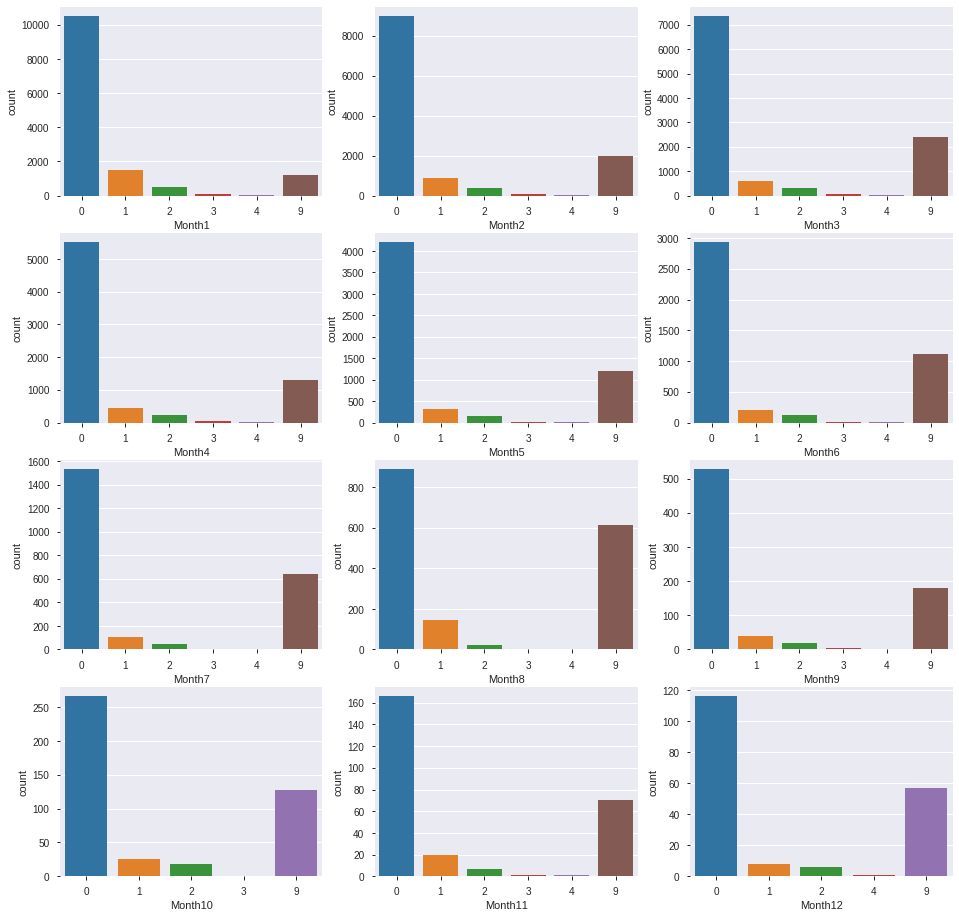

In [77]:
plt.figure(0)
plt.figure(figsize=(16,16))


plt.subplot(431)
sns.countplot(month1)
plt.xlabel('Month1')

plt.subplot(432)
sns.countplot(month2)
plt.xlabel('Month2')

plt.subplot(433)
sns.countplot(month3)
plt.xlabel('Month3')

plt.subplot(434)
sns.countplot(month4)
plt.xlabel('Month4')

plt.subplot(435)
sns.countplot(month5)
plt.xlabel('Month5')

plt.subplot(436)
sns.countplot(month6)
plt.xlabel('Month6')

plt.subplot(437)
sns.countplot(month7)
plt.xlabel('Month7')

plt.subplot(438)
sns.countplot(month8)
plt.xlabel('Month8')

plt.subplot(439)
sns.countplot(month9)
plt.xlabel('Month9')

plt.subplot(4,3,10)
sns.countplot(month10)
plt.xlabel('Month10')

plt.subplot(4,3,11)
sns.countplot(month11)
plt.xlabel('Month11')

plt.subplot(4,3,12)
sns.countplot(month12)
plt.xlabel('Month12')


plt.show()



In [42]:
df5.loc[14000:14030]

,Loan_Id,New_pay_string
14000,PL00027201,099
14001,PL00027202,099
14002,PL00027203,999
14003,PL00027204,999
14004,PL00027205,099
14005,PL00027206,099
14006,PL00027207,099
14007,PL00027208,099
14008,PL00027209,999
14009,PL00027210,999


In [43]:
delta = pd.to_datetime('2019-08-14')-(pd.to_datetime('2019-01-10') + timedelta(days=(30*7)))
x = delta
x

Timedelta('6 days 00:00:00')

In [0]:
Pay_string2 = []
for i in range(len(data)):
  str1 = ''
  if col2[i] != 0:
    a = col2[i]
    for j in range(len(a)):
      delta = pd.to_datetime(a[j])-(pd.to_datetime(data['EMI Start Date'][i]) + timedelta(days=(30*j)))
      x = delta.days
      if ((x>=0) and (x<=5)) or (x<0):
        str1 = str1 + '0-'
      elif (x>=6) and (x<=30):
        str1 = str1 + '1-'
      elif (x>=31) and (x<=60):
        str1 = str1 + '2-'
      elif (x>=61) and (x<=90):
        str1 = str1 + '3-'
      elif (x>90):
        str1 = str1 + '4-'
  else:
    str1 = str1 + ''
  Pay_string2.append(str1)

In [0]:
from datetime import date
import math
list10 = []
for i in range(len(data)):
    str1 = ''
    delta = (pd.to_datetime(date.today())-pd.to_datetime(data['Upcoming EMI Date'][i]))
    x = delta.days
    if x<0 and (col4[i] != 0):
      str1 = str1 + ''
    elif (x>0) and (x> (int(data['No. Of Pending EMIs'][i]*30))) and (col4[i] != 0):
      str1 = str1 + (int(data['No. Of Pending EMIs'][i])*'9-')
    elif (x>0) and (x< (int(data['No. Of Pending EMIs'][i]*30))) and (col4[i] != 0):
      str1 = str1 + (int((math.ceil(x/30)))*'9-')
    list10.append(str1)

In [0]:
list7=[]
for i in range(len(data)):
  list7.append(Pay_string2[i]+list10[i])

In [47]:
list7

['1-0-0-0-0-0-0-0-',
 '0-0-0-0-0-0-0-0-0-',
 '0-0-0-0-0-0-',
 '0-0-0-0-0-0-0-0-0-0-',
 '1-0-0-9-9-9-9-9-9-9-9-9-',
 '0-0-0-0-0-0-',
 '0-0-0-0-0-0-0-0-0-',
 '0-0-0-0-0-0-0-0-',
 '0-0-0-0-0-0-0-0-0-0-0-',
 '0-0-0-0-0-0-1-0-2-2-2-1-',
 '0-0-0-0-0-0-0-0-0-',
 '0-1-1-2-2-3-2-1-2-2-9-',
 '0-0-0-0-0-0-0-0-0-',
 '0-0-0-0-0-0-0-0-0-9-9-9-',
 '1-1-1-0-0-2-0-1-0-0-2-9-',
 '0-1-0-0-0-2-0-0-0-',
 '0-0-0-0-0-0-0-9-',
 '0-1-0-0-0-0-0-0-0-',
 '9-9-9-9-9-9-9-9-9-9-',
 '0-0-0-0-9-9-9-9-',
 '0-0-0-0-0-0-0-0-0-0-0-0-',
 '1-0-1-0-0-0-9-9-',
 '0-0-0-0-0-1-',
 '0-0-0-0-0-0-0-0-0-0-0-0-',
 '0-0-0-0-1-0-0-1-1-1-0-',
 '0-0-0-0-0-0-0-0-0-',
 '9-9-9-9-9-9-9-9-',
 '0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-',
 '0-0-0-0-0-0-0-0-',
 '0-0-0-0-0-0-0-0-1-',
 '0-0-0-0-0-0-0-0-0-',
 '0-0-0-0-2-9-',
 '0-0-0-1-0-0-0-1-',
 '0-1-0-0-0-0-',
 '0-0-0-0-0-0-',
 '0-0-0-0-0-0-0-0-0-0-0-0-0-',
 '0-0-0-0-0-0-0-0-0-0-0-',
 '0-0-0-0-0-0-0-0-0-',
 '0-0-0-0-0-0-0-0-0-',
 '0-0-0-0-0-0-0-0-0-',
 '1-0-0-0-0-0-0-0-0-0-',
 '0-0-0-0-0-0-0-0-0-0-1-',
 '

In [0]:
import datetime
data['Disbursement Date']= pd.to_datetime(data['Disbursement Date'],format = '%d/%m/%Y')

In [0]:
dict2={'Loan_Id':data['Loan Id'],'Disbursement Date':data['Disbursement Date'],'Dealer Name':data['Sub Source Name'],'New_pay_string':list7}

In [0]:
df_5=pd.DataFrame(dict2)

In [51]:
df_5.head()

,Loan_Id,Disbursement Date,Dealer Name,New_pay_string
0,CL00001699,2019-01-16,Morpheous,1-0-0-0-0-0-0-0-
1,CL00001935,2018-12-17,Batra,0-0-0-0-0-0-0-0-0-
2,CL00001979,2018-11-22,Bank Edge,0-0-0-0-0-0-
3,CL00001981,2018-11-19,Truweight,0-0-0-0-0-0-0-0-0-0-
4,CL00001982,2018-12-17,CEDP,1-0-0-9-9-9-9-9-9-9-9-9-


In [0]:
df_5.to_excel('EMI_Tracking.xlsx',index=False)
!cp EMI_Tracking.xlsx drive/My\ Drive/Liquiloans

In [53]:
df_5[df_5['Loan_Id']=='PL00011297']

,Loan_Id,Disbursement Date,Dealer Name,New_pay_string
10956,PL00011297,2019-05-02,Ela Women,4-4-3-2-9-9-9-9-


In [54]:
df_5[df_5['Loan_Id']=='CL00003121']

,Loan_Id,Disbursement Date,Dealer Name,New_pay_string
76,CL00003121,2018-12-18,Kolors Healthcare LLP,0-0-0-0-0-0-0-0-0-9-


In [55]:
df_5[df_5['Loan_Id']=='CL00005949']

,Loan_Id,Disbursement Date,Dealer Name,New_pay_string
412,CL00005949,2019-02-25,Morpheous,0-0-0-0-0-0-0-0-0-0-0-0-0-0-


In [56]:
df_5[df_5['Loan_Id']=='CL00005571']

,Loan_Id,Disbursement Date,Dealer Name,New_pay_string
359,CL00005571,2019-03-05,Truweight,0-0-0-0-0-0-0-0-0-


In [57]:
df_5[df_5['Loan_Id']=='CL00006200']

,Loan_Id,Disbursement Date,Dealer Name,New_pay_string
433,CL00006200,2019-02-27,Radiant Clinic,0-0-0-0-0-0-0-0-0-0-0-0-0-


# Observations
 We have found out that in some of the cases , people have given an EMI in installments . So these cases have to be found and dealt with.
 
 For Example:  PL00011297

In [58]:
# The one way as discussed is to allot the EMI Amount that has been fuuly paid as even (2) and the EMI that has been paid in installments will be shown as odd.


data.columns

Index(['Loan Id', 'Loan Type', 'Interest Type', 'Branch', 'Source',
       'Source Name', 'Sub Source Name', 'Customer Name', 'Customer Mobile',
       'PAN Card', 'Loan Amount', 'Disbursement Amount', 'Disbursement Date',
       'EMI Amount', 'EMI Start Date', 'Upcoming EMI Date',
       'No. Of EMI Received', 'Cumulative Amount Collected',
       'Amount Received In Percentage', 'No. Of Pending EMIs',
       'Cumulative Amount Pending', 'Amount Pending In Percentage',
       'Last Payment Date(s)', 'Last Payment Amount(s)', 'Average DPD',
       'Cumulative OverDue Amount', 'Cumulative Overdue Collected',
       'Cumulative Penalty Amount', 'Cumulative Penalty Amount Collected',
       'Extra Amount Received', 'Mode Of Repayment', 'Nach Status',
       'UMRN Number', 'Agreement Date', 'Balance Disbursement Amount'],
      dtype='object')

In [59]:
data['Last Payment Amount(s)']

0        12000.00,12000.00,12000.00,12000.00,12000.00,1...
1        1800.00,1800.00,1800.00,1800.00,1800.00,1800.0...
2          4720.00,4720.00,4720.00,4720.00,4720.00,4720.00
3        9333.00,9333.00,9333.00,9333.00,9333.00,9333.0...
4                                  7894.74,7894.74,7894.74
                               ...                        
16040                                                  NaN
16041                                                  NaN
16042                                                  NaN
16043                                                  NaN
16044                                                  NaN
Name: Last Payment Amount(s), Length: 16045, dtype: object

In [0]:
lst=list(data['Last Payment Amount(s)'])

In [61]:
type(lst)

list

In [62]:
print(lst[10956])

6697.00,836.00,7533.00,1696.00


In [63]:
print(lst[0:2])

['12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00', '1800.00,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00,1800.00']


In [0]:
# To convert and split a list into lists of lists

col_1 = data['Last Payment Amount(s)']
col_3 = []
for i in range(len(col_1)):
  if type(col_1[i]) == str:
    col_3.append(col_1[i].split(','))
  else:
    col_3.append(0)

In [65]:
col_3

[['12000.00',
  '12000.00',
  '12000.00',
  '12000.00',
  '12000.00',
  '12000.00',
  '12000.00',
  '12000.00'],
 ['1800.00',
  '1800.00',
  '1800.00',
  '1800.00',
  '1800.00',
  '1800.00',
  '1800.00',
  '1800.00',
  '1800.00'],
 ['4720.00', '4720.00', '4720.00', '4720.00', '4720.00', '4720.00'],
 ['9333.00',
  '9333.00',
  '9333.00',
  '9333.00',
  '9333.00',
  '9333.00',
  '9333.00',
  '9333.00',
  '9333.00',
  '9333.00'],
 ['7894.74', '7894.74', '7894.74'],
 ['5506.67', '5506.67', '5506.67', '5506.67', '5506.67', '5506.67'],
 ['2139.20',
  '2139.20',
  '2139.20',
  '2139.20',
  '2139.20',
  '2139.20',
  '2139.20',
  '2139.20',
  '2139.20'],
 ['9333.33',
  '9333.33',
  '9333.33',
  '9333.33',
  '9333.33',
  '9333.33',
  '9333.33',
  '9333.33'],
 ['13329.93',
  '13329.93',
  '13329.93',
  '13329.93',
  '13329.93',
  '13329.93',
  '13329.93',
  '13329.93',
  '13329.93',
  '13329.93',
  '13329.93'],
 ['4588.89',
  '4588.89',
  '4588.89',
  '4588.89',
  '4588.89',
  '4588.89',
  '4588.

In [66]:
type(col_3)

list

In [67]:
# This is how we get the elements one by one in the list of lists.
col_3[0][1]

'12000.00'

In [68]:
col_5 = data['EMI Amount'].values.tolist()
type(col_5)

list

In [69]:
col_5

[12000.0,
 1800.0,
 4720.0,
 9333.0,
 7894.74,
 5506.67,
 2139.2,
 9333.33,
 13329.93,
 4588.89,
 3700.0,
 5417.0,
 5400.0,
 3866.67,
 6666.67,
 1509.9,
 6200.0,
 6000.0,
 5000.0,
 6800.0,
 5888.89,
 5000.0,
 5506.67,
 5888.89,
 4062.5,
 2500.0,
 2500.0,
 3000.0,
 3500.0,
 1500.0,
 2500.0,
 2100.0,
 5500.0,
 3146.67,
 3000.0,
 5888.89,
 4333.33,
 1416.0,
 1600.0,
 1600.0,
 4820.0,
 5888.89,
 3546.67,
 5839.08,
 3180.0,
 2083.0,
 2500.0,
 2000.0,
 4500.0,
 2590.0,
 6400.0,
 1888.0,
 5500.0,
 5000.0,
 2000.0,
 5244.44,
 5000.0,
 2041.5,
 2000.0,
 2500.0,
 2950.0,
 10333.33,
 1800.0,
 3333.33,
 4000.0,
 1966.67,
 5244.44,
 13917.0,
 10000.0,
 3216.0,
 5708.0,
 6480.0,
 5000.0,
 2500.0,
 4533.33,
 5000.0,
 7000.0,
 3888.0,
 16500.0,
 2950.0,
 3333.33,
 14000.0,
 3125.0,
 4700.0,
 2000.0,
 2666.67,
 3240.0,
 5000.0,
 5000.0,
 2266.67,
 5572.22,
 3300.0,
 3924.0,
 2950.0,
 2400.0,
 1600.0,
 4444.44,
 5990.0,
 3500.0,
 4000.0,
 3933.33,
 6250.0,
 2000.0,
 1916.67,
 1500.0,
 3605.2,
 4050.0,
 

In [70]:
float(col_3[1][1])<float(col_5[0]) # Compating the two float values.

True

In [0]:
col_7 =[]
for i in range(len(col_3)):
  if col_3[i]!=0:
    x=col_3[i] + ['0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0']
    col_7.append(x)
  else:
    col_7.append(0)
        

In [0]:
Pay_string3 = []
for i in range(len(data)):
  str1= ''
  if (col2[i] != 0) and (col_7[i]!=0):
    a = col2[i]
    b=col_7[i]
    for j in range(len(a)):
      delta = pd.to_datetime(a[j])-(pd.to_datetime(data['EMI Start Date'][i]) + timedelta(days=(30*j)))
      x = delta.days
      if (((x>=0) and (x<=5)) or (x<0)) and (float(b[j])==float(data['EMI Amount'][i])):
        str1 = str1 + str(0)
      elif (x>=6) and (x<=30) and (float(b[j])==float(data['EMI Amount'][i])):
        str1 = str1 + str(1)
      elif (x>=31) and (x<=60) and (float(b[j])==float(data['EMI Amount'][i])):
        str1 = str1 + str(2)
      elif (x>=61) and (x<=90) and (float(b[j])==float(data['EMI Amount'][i])):
        str1 = str1 + str(3)
      elif (x>90) and (float(b[j])==float(data['EMI Amount'][i])):
        str1 = str1 +str(4)
      elif (((x>=0) and (x<=5)) or (x<0)) and ((float(b[j])+ float(b[j+1]))==float(data['EMI Amount'][i])):
        str1 = str1 + str(0)
      elif (x>=6) and (x<=30) and ((float(b[j])+ float(b[j+1]))==float(data['EMI Amount'][i])):
        str1 = str1 + str(1)
      elif (x>=31) and (x<=60) and ((float(b[j])+ float(b[j+1]))==float(data['EMI Amount'][i])):
        str1 = str1 + str(2)
      elif (x>=61) and (x<=90) and ((float(b[j])+ float(b[j+1]))==float(data['EMI Amount'][i])):
        str1 = str1 + str(3)
      elif (x>90) and ((float(b[j]) + float(b[j+1]))==float(data['EMI Amount'][i])):
        str1 = str1 +str(4)
      elif (((x>=0) and (x<=5)) or (x<0)) and ((float(b[j])+ float(b[j+1])+float(b[j+2]))==float(data['EMI Amount'][i])):
        str1 = str1 + str(0)
      elif ((x>=6) and (x<=30)) and ((float(b[j])+ float(b[j+1])+float(b[j+2]))==float(data['EMI Amount'][i])):
        str1 = str1 + str(1)
      elif ((x>=31) and (x<=60)) and ((float(b[j])+ float(b[j+1])+float(b[j+2]))==float(data['EMI Amount'][i])):
        str1 = str1 + str(2)
      elif ((x>=61) and (x<=90)) and ((float(b[j])+ float(b[j+1])+float(b[j+2]))==float(data['EMI Amount'][i])):
        str1 = str1 + str(3)
      elif (x>=91) and ((float(b[j])+ float(b[j+1])+float(b[j+2]))==float(data['EMI Amount'][i])):
        str1 = str1 +str(4)                 
  else:
    str1 = str1 + ''
  Pay_string3.append(str1)

In [0]:
# for '9'
from datetime import date
import math
new_list10 = []
for i in range(len(data)):
    str1 = ''
    delta = (pd.to_datetime(date.today())-pd.to_datetime(data['Upcoming EMI Date'][i]))
    x = delta.days
    if x<0 and (col4[i] != 0):
      str1 = str1 + ''
    elif (x>0) and (x> (int(data['No. Of Pending EMIs'][i]*30))) and (col4[i] != 0):
      str1 = str1 + (int(data['No. Of Pending EMIs'][i])*'9-')
    elif (x>0) and (x< (int(data['No. Of Pending EMIs'][i]*30))) and (col4[i] != 0):
      str1 = str1 + (int((math.ceil(x/30)))*'9-')
    new_list10.append(str1)

In [0]:
new_l11=[]
for i in range(len(data)):
   new_l11.append(Pay_string3[i]+new_list10[i])

In [0]:

dict6={'Loan ID':data['Loan Id'],'New_Pay_String':new_l11}
df_l=pd.DataFrame(dict6)

In [102]:
df_l.head()

,Loan ID,New_Pay_String
0,CL00001699,10000000
1,CL00001935,000000000
2,CL00001979,000000
3,CL00001981,0000000000
4,CL00001982,1009-9-9-9-9-9-9-9-9-


In [103]:
df_5[df_5['Loan_Id']=='PL00011297'] # The old value

,Loan_Id,Disbursement Date,Dealer Name,New_pay_string
10956,PL00011297,2019-05-02,Ela Women,4-4-3-2-9-9-9-9-


In [104]:
df_l[df_l['Loan ID']=='PL00011297'] # The New revised value

,Loan ID,New_Pay_String
10956,PL00011297,439-9-9-9-
